# config Settings
<div class="alert alert-block alert-info">
<b> 显示这样效果的源代码在下方 </b> 
</div>

<div class="alert alert-block alert-info">
<b>raw link :</b> 
</div>

## jupyter notebook theme

jt -t monokai -f firacode -cellw 95% -fs 10 -tf fira -tfs 8 -nf firacode -nfs 8 -dfs 8 -lineh 120 -T  # set to be sublime alike style

## basic 
numpy, pandas, matplotlib, path-settings

In [2]:
from __future__ import print_function
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'

from matplotlib import pyplot as plt
plt.style.use(['science','no-latex','grid','high-contrast']) # high-contrast指的是配色的选取
%pylab inline

# %load_ext autoreload
# %autoreload 2
import numpy as np
import pandas as pd 
pd.options.display.max_rows=5  # 设置dataframe最多的显示行数
import os
import sys
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
    print(f"After inserting, sys.path is {sys.path}")

Populating the interactive namespace from numpy and matplotlib


## Trivial

In [6]:
# enlarge output in jupyter lab
from IPython.display import HTML
display(HTML('''<style>[data-mime-type="application/vnd.jupyter.stdout"] pre { font-size:28px}</style>'''))

-----

# 画图

## matplotlib

### reference
* [x] [differ fig/axes/plot](https://zhuanlan.zhihu.com/p/93423829)
* [x] [official doc](https://matplotlib.org/tutorials/introductory/usage.html)
* [x] [色彩大全](https://juejin.cn/post/6844904145032331272)
* [x] [这个笔记](https://zhuanlan.zhihu.com/p/33270402)讲解的很完整

In [3]:
InteractiveShell.ast_node_interactivity='last_expr'

#### SciencePlots已经够用

就是要确保 Times New Roman字体可用，具体教程可以看[Hesy:论文写作相关 目录](https://blog.csdn.net/Hesy_H/article/details/109104483)

with结构，脱离于全局，仅使用一次，不影响全局设置

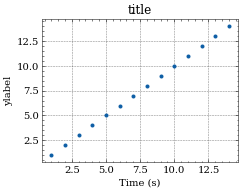

In [7]:
with plt.style.context(['science', 'no-latex','grid','scatter']):
    plt.plot(np.array(range(1,15)),np.array(range(1,15)),)
    plt.xlabel('Time (s)')
    plt.ylabel('ylabel') 
    plt.title('title') 

for both ax and plt API，it works well.

[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'ylabel'), Text(0.5, 1.0, 'title')]

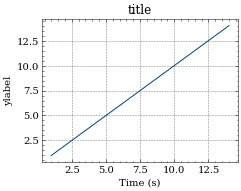

In [5]:
# plt.style.use(['science','no-latex','grid','high-contrast']) # this is put in the header
fig,ax = plt.subplots() # differ from plt.subplot() which adds a subplot to the current figure , subplots adds subplots to a new figure and return both
""" this is my commly used settings """
ax.plot(np.array(range(1,15)),np.array(range(1,15)),)
ax.set(xlabel='Time (s)',ylabel='ylabel',title='title')

#### 进一步精细的调整

'\nplt.subplots_adjust(wspace =0.998, hspace=0.2, left= 0.2 , right=0.8)#调整子图间距\nplt.figure()\nfor city in range(3):\n    for day in range(5):   \n        plt.subplot(131+city)\n        plt.plot( range(traffic_data.shape[1]),traffic_data[day_index+day,:,city_index+city] )\n        plt.legend([f"day{str(i+10)}" for i in range(10)])\n        plt.xlabel("time")\n        plt.ylabel("traffic_flow")\n'

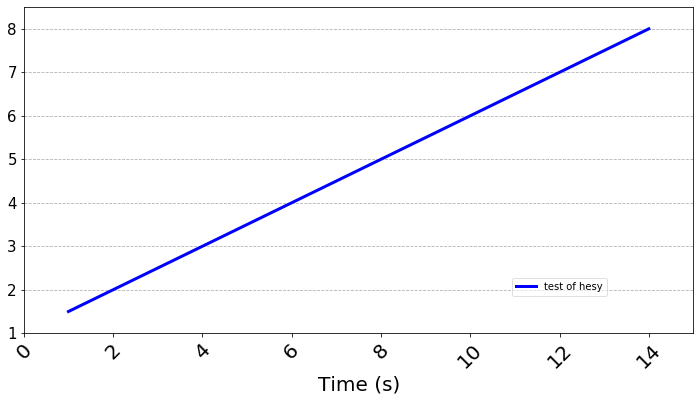

In [9]:
######### recommend axex usage ######### 
fig,ax = plt.subplots() # differ from plt.subplot() which adds a subplot to the current figure , subplots adds subplots to a new figure and return both
# fig, ax = plt.subplots(2,1,figsize(14,7))
# ax[0].***
# ax[1].***

""" this is my commly used settings """
ax.plot(np.array(range(1,15)),
        np.array(range(1,15)),
        label='generated by ax',
        color='b',
        linewidth=3.0
       )
ax.grid(axis="y",linestyle='--')	# set grid ,default axis is both of x and y, and line of "-"
ax.set_xlabel('Time (s)', fontsize=20)	# label setting , fontweight="bold" is ugly ,fontdict也可以（including size ,label）
ax.xaxis.set_tick_params(labelsize=20,rotation=45)	# tick setting ( larger and will get bold )
ax.set_yticklabels(range(1,15),fontsize=15)

### keep the figure range
ax.set_xlim(0, int(math.ceil(20)))
plt.axis([0, 15, 0, 15])

fig.set_size_inches(12, 6)

# legend setting 
handlers, labels = ax.get_legend_handles_labels()  # handler is the line object (e.g. Line2D once you print it out)
ax.legend( handlers, labels,loc='lower center',bbox_to_anchor=(0.8,0.1) )
# """
### method 1
lgd = ax.legend(handlers, labels, scatterpoints=1, bbox_to_anchor=(0.5, -0.1), 
      loc='upper center', ncol=2, fontsize=20,framealpha=0.6)    # bbox_to_anchor(bigger and righter, bigger and upper), loc is governed by bbox_to_anchor
fig.savefig("fig.svg", bbox_extra_artists=(lgd,),bbox_inches='tight', pad_inches=0.1,type = "svg")   
# """
"""
### method 2
plt.legend(handlers[:],["test1","test2"],prop = {'size':20},loc='lower center',bbox_to_anchor=(0.8,0.1),framealpha=0.6)	 # framealpha controls transparency
fig.savefig("fig.svg",bbox_inches='tight', pad_inches=0.1,type = "svg")  
"""

######### not recommend plt, but quick for subplooting recursively ######### 
"""
plt.subplots_adjust(wspace =0.998, hspace=0.2, left= 0.2 , right=0.8)#调整子图间距
plt.figure()
for city in range(3):
    for day in range(5):   
        plt.subplot(131+city)
        plt.plot( range(traffic_data.shape[1]),traffic_data[day_index+day,:,city_index+city] )
        plt.legend([f"day{str(i+10)}" for i in range(10)])
        plt.xlabel("time")
        plt.ylabel("traffic_flow")
"""

### 双y轴画法

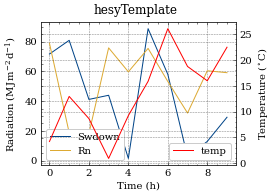

In [17]:
from matplotlib import rc
rc('mathtext', default='regular')

time = np.arange(10)
temp = np.random.random(10)*30
Swdown = np.random.random(10)*100-10
Rn = np.random.random(10)*100-10

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()


ax.plot(time, Swdown, '-', )
ax.plot(time, Rn, '-', label = 'Rn')
ax.legend(['Swdown','Rn'],loc="lower left")

ax2.plot(time, temp, '-r', label = 'temp')
ax2.legend(['temp'],loc="lower right")

ax.set(xlabel='Time (h)',ylabel=r"Radiation ($MJ\,m^{-2}\,d^{-1}$)")
ax2.set(ylabel=r"Temperature ($^\circ$C)")

fig.suptitle("hesyTemplate")
fig.savefig('hesyTemplate.pdf')

### bar 柱状图

数据制造

In [5]:
deci_time = pd.DataFrame({
    'Mars': [0.69, 0.95, 1.43],
    'DRL-TE': [6.32, 26.73, 91.13],
    'LP-based': [9.46, 92.34, 493.65],
}) 
MC = pd.DataFrame({
    'Mars': [4.5,6.2, 8.3],
    'DRL-TE': [14.5, 16, 18.2],
    'LP-based': [12.2, 13, 14],
}) 
TC = pd.DataFrame({
    'Mars': [4.7, 10.1, 18.3],
    'DRL-TE': [19.4, 20, 32],
    'LP-based': [30.1, 45, 88.7],
}) 
topo_name = ['GEANT','Ntelos','Viatel']
deci_time.index =topo_name
MC.index =topo_name
TC.index =topo_name

In [6]:
deci_time.head()

,Mars,DRL-TE,LP-based
GEANT,0.69,6.32,9.46
Ntelos,0.95,26.73,92.34
Viatel,1.43,91.13,493.65


处理横轴的位置

In [17]:
bar_wid=0.4
r1 = [1,3,5]
r2 = [x + bar_wid+0.1 for x in r1]
r3 = [x + bar_wid+0.1 for x in r2]

indexs = []
for cur_index in range(3):
    indexs.append(r1[cur_index])
    indexs.append(r2[cur_index])    
    indexs.append(r3[cur_index])    

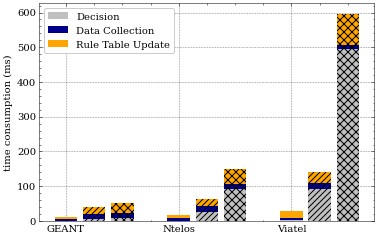

In [30]:
# with plt.style.context(['science', 'no-latex','grid','notebook']):
plt.bar(r1,deci_time['Mars'],width=bar_wid,color='silver')
plt.bar(r1,MC['Mars'],width=bar_wid,color='darkblue',bottom =deci_time['Mars'])
plt.bar(r1,TC['Mars'],width=bar_wid,color='orange',bottom =deci_time['Mars']+MC['Mars'])
plt.legend(['Decision','Data Collection','Rule Table Update'])

# duplicate for legend without hatch
plt.bar(r1,deci_time['Mars'],width=bar_wid,color='silver')
plt.bar(r1,MC['Mars'],width=bar_wid,color='darkblue',bottom =deci_time['Mars'])
plt.bar(r1,TC['Mars'],width=bar_wid,color='orange',bottom =deci_time['Mars']+MC['Mars'])

plt.bar(r2,deci_time['DRL-TE'],width=bar_wid,color='silver',hatch='////')
plt.bar(r2,MC['DRL-TE'],width=bar_wid,color='darkblue',bottom =deci_time['DRL-TE'],hatch='////')
plt.bar(r2,TC['DRL-TE'],width=bar_wid,color='orange',bottom =deci_time['DRL-TE']+MC['DRL-TE'],hatch='////')

plt.bar(r3,deci_time['LP-based'],width=bar_wid,color='silver',hatch='xxx')
plt.bar(r3,MC['LP-based'],width=bar_wid,color='darkblue',bottom =deci_time['LP-based'],hatch='xxx')
plt.bar(r3,TC['LP-based'],width=bar_wid,color='orange',bottom =deci_time['LP-based']+MC['LP-based'],hatch='xxx')

xticks(r1, topo_name,)
plt.ylabel('time consumption (ms)')
# plt.savefig('control-loop-time-cost.pdf')

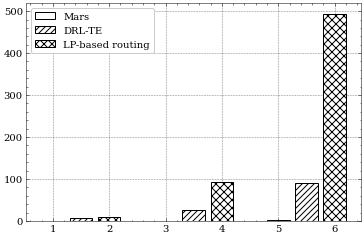

In [35]:
plt.bar(r1,deci_time['Mars'],width=bar_wid,color='white',edgecolor='black')
plt.bar(r2,deci_time['DRL-TE'],width=bar_wid,color='white',edgecolor='black',hatch='////')
plt.bar(r3,deci_time['LP-based'],width=bar_wid,color='white',edgecolor='black',hatch='xxx')
plt.legend(['Mars','DRL-TE','LP-based routing'])
# plt.savefig('legend.pdf')

<br><br><br>


-----

## seaborn

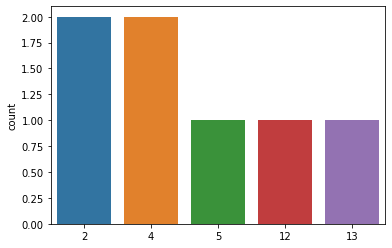

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# for jupyetr u need this
sns.countplot([13,2,2,4,12,5,4])  # histgram